# Multiple Plots

When we were working with a single plot, `pyplot` was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# renders plots in Jupyter notebook
%matplotlib inline

# read csv file
unrate = pd.read_csv('unrate.csv')

Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

- a container for all plots was *created* (returned as a `Figure` object)
- a container for the plot was *positioned* on a grid (the plot returned as an `Axes` object)
- visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

**We can manually create and customise a figure:**
> `fig = plt.figure()` <br/>
> `fig = plt.figure(figsize=(width, height))`

Instead of only calling the pyplot function, we assigned its return value to a variable (`fig`). After a *figure* is created, an axes for a single plot containing no data is created within the context of the figure.

**To add a new subplot to an existing figure:**
> `axes_obj = fig.add_subplot(nrows, ncols, plot_number)`

![](https://s3.amazonaws.com/dq-content/multiple_subplots.png)

The Axes object acts as its own container for the various components of the plot, such as:
- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
    - markers
    - lines
    - gridlines
    
When the first subplot is created, matplotlib knows to create a grid with 2 rows and 2 columns. As we add each subplot, we specify the plot number we want returned and the corresponding *Axes object* is created and returned.

![](https://s3.amazonaws.com/dq-content/subplot_grid.png)

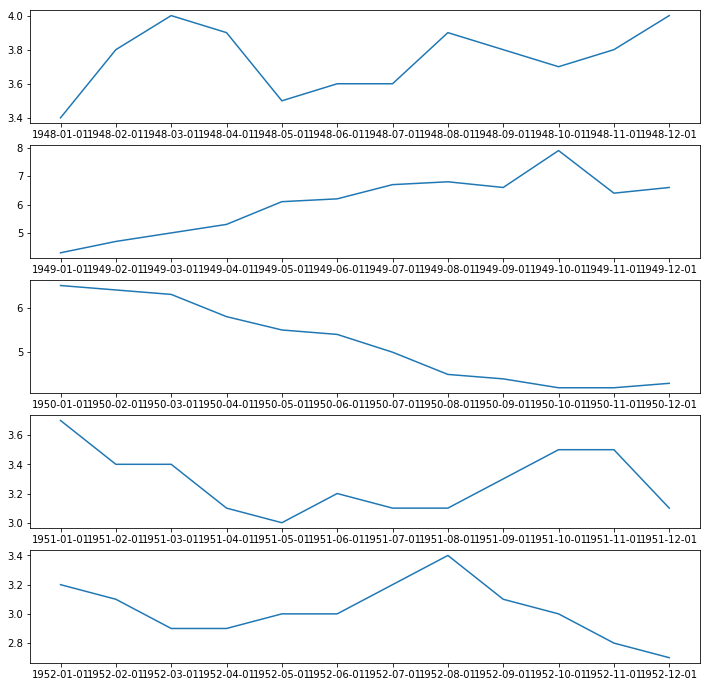

In [16]:
# create a figure object
fig = plt.figure(figsize=(5, 12)) # change figure size to 12in wide and 5in tall

# create five subplots
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)


# plot Axes
ax1.plot(unrate.DATE.head(12), unrate.VALUE.head(12)) # top subplot
ax2.plot(unrate.DATE.iloc[12:24], unrate.VALUE.iloc[12:24])
ax3.plot(unrate[24:36]['DATE'], unrate[24:36]['VALUE'])
ax4.plot(unrate[36:48]['DATE'], unrate[36:48]['VALUE'])
ax5.plot(unrate[48:60]['DATE'], unrate[48:60]['VALUE'])# bottom subplot

# display plot
plt.show()

By adding more line charts, we can look across more years for seasonal trends. This comes at a cost, unfortunately. We now have to visually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data. 

**Limitations of table representation**
> *"the amount of time we spend scanning the table as the number of rows increases significantly"*

**To extract the month values** from the `DATE` column and assign them to a new column, we can use the `pandas.Series.dt` accessor

> `unrate['MONTH'] = unrate['DATE'].dt.month`

Calling `pandas.Series.dt.month` return a *Series* containing the integer values for each month (e.g. `1` for January, `2` for February, etc.)

By default, matplotlib will select a different colour for each line. To specify the colour ourselves, use the `c` parameter when calling `plot()`:

> `plt.plot(unrate[0:12]['MONTH'],unrate[0:12]['VALUE'], c='red')`

We can create the legend using `pyplot.legend` and specify its location using the `loc` parameter:
> `plt.legend(loc='upper left')`

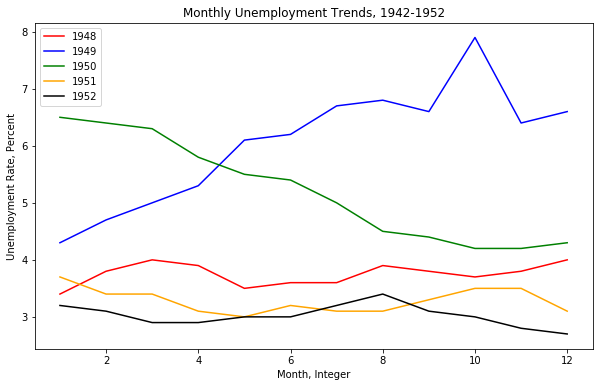

In [39]:
# convert the DATE column into a series of datetime values
unrate.DATE = pd.to_datetime(unrate.DATE)

# extract values
unrate['MONTH'] = unrate.DATE.dt.month
unrate['YEAR'] = unrate.DATE.dt.year

# set the plot area to a width of 6in and height of 3in
fig = plt.figure(figsize=(10, 6))

# set the colors for each year
colors = ['red', 'blue', 'green', 'orange', 'black']
# set the labels for each year
labels = ['1948', '1949', '1950', '1951', '1952']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    # generate line charts in the base subplot, using the MONTH column
    plt.plot(subset.MONTH, subset.VALUE, c=colors[i], label=labels[i])


# add elements to the plot    
plt.legend(loc='upper left') # place the legend in the upper left corner
plt.title("Monthly Unemployment Trends, 1942-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")

# display plot
plt.show()